DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

# Face and Object Detection

This notebook demonstrates simple the Viola-Jones face detection on a painting. This is implemented in opencv.

Viola and Jones, 'Rapid Object Detection using a Boosted Cascade of Simple
Features' (2007) http://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf

## Face and Eye Detection with Haar Cascade Classifiers in OpenCV

- Here is a good video visualization of Haar Cascade Classifier in action, from Adam Harvey: https://vimeo.com/12774628
- His project CVDazzle has to do with fashion/makeup design to avoid face classifiers: https://cvdazzle.com/
- He gave a good interview on the Viola-Jones face detecter: https://web.archive.org/web/20171204220159/http://www.makematics.com/research/viola-jones/

If you have not yet installed opencv on your instance of datahub (or your local machine), uncomment the following command and run:

In [1]:
!pip install opencv-python-headless --user
!pip install opencv-contrib-python-headless --user

Import modules and do some setup

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from skimage import io
from scipy import ndimage
from skimage.color import rgb2hsv
import skimage

See if a haar face detector can find the face in a famous portrait

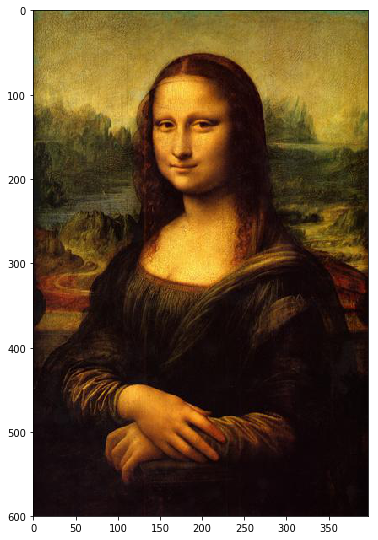

In [5]:
portrait = io.imread('https://uploads4.wikiart.org/images/leonardo-da-vinci/mona-lisa.jpg!Large.jpg')
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(portrait)

### Haar cascade

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects on test images.

The algorithm has four stages:

1. __Haar Feature Selection__ - First step is to collect the Haar Features.  A Haar feature considers adjacent rectangular regions at a specific location in a detection window, sums up the pixel intensities in each region and calculates the difference between these sums.

2. __Creating  Integral Images__ - Integral image technique is used to speeden up calculating sum of pixels. Involves building precomputed matrices.

3. __Adaboost Training__ - Adaboost selects the best features and trains the classifiers that use them. 

4. __Cascading Classifiers__ - The cascade classifier consists of a collection of stages, where each stage is an ensemble of weak learners. The weak learners are simple classifiers. The stages are designed to reject negative samples as fast as possible. 







In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

portrait_cv = cv2.cvtColor(portrait, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2GRAY)

detect with cascade

In [7]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    portrait_cv = cv2.rectangle(portrait_cv,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = portrait_cv[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

show results

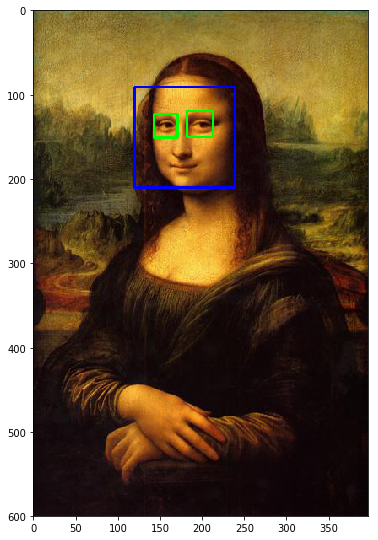

In [8]:
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2RGB))

Let's also try to detect the smile using a pretrained smile cascade:

In [ ]:
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    portrait_cv = cv2.rectangle(portrait_cv,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = portrait_cv[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    smiles = smile_cascade.detectMultiScale(roi_gray)
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)

show results

In [ ]:
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2RGB))

NOTE: both the eye and the mouth are "detected" as smiles/mouths.

For what genres of painting would it be useful to detect faces a image features? (metadata)

## References

Most contemporary face and object detection is accomplished through convolutional neural networks. We will talk about this in week 4. 

Harr Cascade Classifiers still have some use on compute-constrained platforms, for instance embedded systems (raspberry pi), and for realtime applications.

- Viola and Jones, 'Rapid Object Detection using a Boosted Cascade of Simple
Features' (2007) http://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf
- Opencv-Python [Tutorial on Face Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection)
- Extended video lecture on Haar Classifiers: https://www.youtube.com/watch?v=WfdYYNamHZ8